In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Futura')
import pandas as pd
from IPython.display import display

df = pd.read_csv('TTS_LBNL_public_file_07-Sep-2022_all.csv')

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3898072435.py:7: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TTS_LBNL_public_file_07-Sep-2022_all.csv')


In [2]:
list(df.columns)

['data_provider_1',
 'data_provider_2',
 'system_ID_1',
 'system_ID_2',
 'installation_date',
 'system_size_DC',
 'total_installed_price',
 'rebate_or_grant',
 'customer_segment',
 'expansion_system',
 'multiple_phase_system',
 'new_construction',
 'tracking',
 'ground_mounted',
 'zip_code',
 'city',
 'state',
 'utility_service_territory',
 'third_party_owned',
 'installer_name',
 'self_installed',
 'azimuth_1',
 'azimuth_2',
 'azimuth_3',
 'tilt_1',
 'tilt_2',
 'tilt_3',
 'module_manufacturer_1',
 'module_model_1',
 'module_quantity_1',
 'module_manufacturer_2',
 'module_model_2',
 'module_quantity_2',
 'module_manufacturer_3',
 'module_model_3',
 'module_quantity_3',
 'additional_modules',
 'technology_module_1',
 'technology_module_2',
 'technology_module_3',
 'BIPV_module_1',
 'BIPV_module_2',
 'BIPV_module_3',
 'bifacial_module_1',
 'bifacial_module_2',
 'bifacial_module_3',
 'nameplate_capacity_module_1',
 'nameplate_capacity_module_2',
 'nameplate_capacity_module_3',
 'efficienc

In [3]:
test = df[['tilt_1', 'BIPV_module_1']]
test.drop(test[test['BIPV_module_1'] == -1].index, inplace=True)
test.drop(test[test['tilt_1'] < 90].index, inplace=True)
test.head()
test.info()

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/862102194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(test[test['BIPV_module_1'] == -1].index, inplace=True)
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/862102194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(test[test['tilt_1'] < 90].index, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 94571 to 2263612
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tilt_1         1097 non-null   float64
 1   BIPV_module_1  1097 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 25.7 KB


In [4]:
#Create new data frame with desired data fields
pv = df[['installation_date', 'system_size_DC', 'total_installed_price', 'rebate_or_grant', 'tilt_1','module_manufacturer_1','BIPV_module_1', 'efficiency_module_1']]

In [5]:
#Remove data that does not specify if BIPV or not
#Rewrite installation date in year-month-day format
#Remove pre-2010 data
pv.drop(pv[pv['BIPV_module_1'] == -1].index, inplace = True)
pv['installation_date'] = pd.to_datetime(pv['installation_date'], dayfirst = True)
pv.drop(pv[pv['installation_date'] <= '2010-01-01'].index, inplace = True)
pv.drop(pv[pv['installation_date'] >= '2022-12-31'].index, inplace = True)
pv.head()

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3074052240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv.drop(pv[pv['BIPV_module_1'] == -1].index, inplace = True)
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3074052240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv['installation_date'] = pd.to_datetime(pv['installation_date'], dayfirst = True)
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3074052240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,tilt_1,module_manufacturer_1,BIPV_module_1,efficiency_module_1
480,2011-06-03,17.130,195306.0,175579.0,45.0,"Prism Solar Technologies, Inc.",0,0.119668
482,2010-12-21,67.500,317669.0,113710.0,10.0,Suntech Power,0,0.139150
912,2010-07-29,5.488,22147.0,16200.0,40.0,"CSI Solar Co., Ltd.",0,0.169509
924,2010-08-02,5.600,20500.0,16200.0,40.0,"CSI Solar Co., Ltd.",0,0.169509
1389,2010-02-26,78.540,620150.0,221465.0,10.0,Solaria,0,0.126950


In [6]:
#Calculate total installed $/W
pv['total $/W'] = pv['total_installed_price']/(1000* pv['system_size_DC'])

#Calculate $/W with rebates or grants included
pv['$']  = pv['total_installed_price'] - pv['rebate_or_grant']
pv['$/W'] = pv['$']/(1000 * pv['system_size_DC'])

pv.head()

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3416209806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv['total $/W'] = pv['total_installed_price']/(1000* pv['system_size_DC'])
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3416209806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv['$']  = pv['total_installed_price'] - pv['rebate_or_grant']
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/3416209806.py:6: SettingWithCopyWarning: 
A value is 

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,tilt_1,module_manufacturer_1,BIPV_module_1,efficiency_module_1,total $/W,$,$/W
480,2011-06-03,17.130,195306.0,175579.0,45.0,"Prism Solar Technologies, Inc.",0,0.119668,11.401401,19727.0,1.151605
482,2010-12-21,67.500,317669.0,113710.0,10.0,Suntech Power,0,0.139150,4.706207,203959.0,3.021615
912,2010-07-29,5.488,22147.0,16200.0,40.0,"CSI Solar Co., Ltd.",0,0.169509,4.035532,5947.0,1.083637
924,2010-08-02,5.600,20500.0,16200.0,40.0,"CSI Solar Co., Ltd.",0,0.169509,3.660714,4300.0,0.767857
1389,2010-02-26,78.540,620150.0,221465.0,10.0,Solaria,0,0.126950,7.895977,398685.0,5.076203


In [7]:
#Remove outliers (above $25/W, below $2/W)
pv.drop(pv[pv['total $/W'] >= 25].index, inplace = True)
pv.drop(pv[pv['total $/W'] <= 2].index, inplace = True)

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/1588684143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv.drop(pv[pv['total $/W'] >= 25].index, inplace = True)
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_25964/1588684143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv.drop(pv[pv['total $/W'] <= 2].index, inplace = True)


In [8]:
#Group by year for plotting purposes.
year = list(range(2010,2023,1))

avg_BIPV = pv[pv['BIPV_module_1'] == 1].groupby(pv.installation_date.dt.year)['total $/W'].mean()
avg_pv = pv[pv['BIPV_module_1'] == 0].groupby(pv.installation_date.dt.year)['total $/W'].mean()
print(avg_BIPV)
print(avg_pv)

installation_date
2010.0    7.395290
2011.0    7.474790
2012.0    5.968390
2013.0    4.871570
2014.0    3.272211
2015.0    4.199388
2016.0    6.565447
2017.0    4.929643
2018.0    5.544463
2019.0    6.546912
2020.0    6.218473
2021.0    6.414916
2022.0    4.247652
Name: total $/W, dtype: float64
installation_date
2010.0    7.020884
2011.0    6.545826
2012.0    5.592984
2013.0    4.966907
2014.0    4.663373
2015.0    4.606515
2016.0    4.428562
2017.0    4.177416
2018.0    4.127015
2019.0    4.101158
2020.0    4.179342
2021.0    4.145163
2022.0    4.100895
Name: total $/W, dtype: float64


Text(0, 0.5, '$/W')

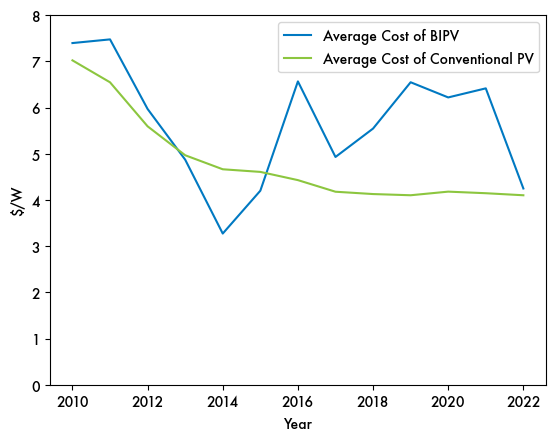

In [17]:
#ffont = {'fontname' : 'Futura' }
plt.figure(1)
plt.plot(year, avg_BIPV, label = 'Average Cost of BIPV', color ='#0079C2')
plt.plot(year, avg_pv, label = 'Average Cost of Conventional PV', color ='#8CC63F')
plt.legend()
plt.ylim([0, 8])
plt.xlabel('Year')
plt.ylabel('$/W')
#plt.title('Comparing Average Cost of BIPV vs. PV')

In [10]:
#Group by year for plotting purposes. With rebates&grants
year = list(range(2010,2023,1))

avg_BIPV_rebate = pv[pv['BIPV_module_1'] == 1].groupby(pv.installation_date.dt.year)['$/W'].mean()
avg_pv_rebate = pv[pv['BIPV_module_1'] == 0].groupby(pv.installation_date.dt.year)['$/W'].mean()
print(avg_BIPV_rebate)
print(avg_pv_rebate)

installation_date
2010.0    5.604725
2011.0    6.949799
2012.0    5.266857
2013.0    4.143876
2014.0    2.167222
2015.0    3.186822
2016.0    6.142026
2017.0    4.784217
2018.0    5.475671
2019.0    6.528157
2020.0    6.212940
2021.0    6.392628
2022.0    4.111833
Name: $/W, dtype: float64
installation_date
2010.0    5.788740
2011.0    5.732167
2012.0    5.014381
2013.0    4.494859
2014.0    4.186005
2015.0    4.440880
2016.0    4.324247
2017.0    4.075361
2018.0    4.045314
2019.0    4.038209
2020.0    4.131058
2021.0    4.110595
2022.0    3.868120
Name: $/W, dtype: float64


Text(0.5, 1.0, 'Comparing Average Cost of BIPV vs. PV with Rebates & Grants')

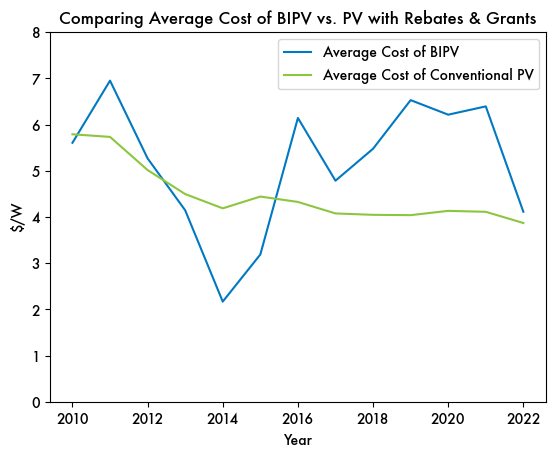

In [11]:
plt.figure(2)
plt.plot(year, avg_BIPV_rebate, label = 'Average Cost of BIPV', color ='#0079C2')
plt.plot(year, avg_pv_rebate, label = 'Average Cost of Conventional PV', color ='#8CC63F')
plt.legend()
plt.ylim([0, 8])
plt.xlabel('Year')
plt.ylabel('$/W')
plt.title('Comparing Average Cost of BIPV vs. PV with Rebates & Grants')

Text(0, 0.5, '$/W')

<Figure size 640x480 with 0 Axes>

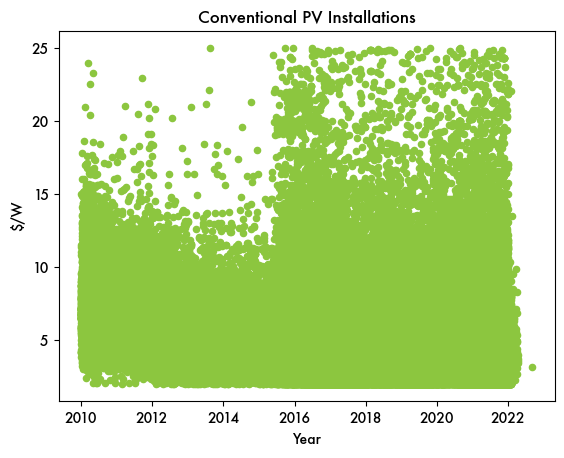

In [12]:
plt.figure(3)
pv_scatter = pv[pv['BIPV_module_1']==0].plot.scatter(x = 'installation_date', y = 'total $/W', color = '#8CC63F')
pv_scatter.set_title('Conventional PV Installations')
pv_scatter.set_xlabel('Year')
pv_scatter.set_ylabel('$/W')

Text(0, 0.5, '$/W')

<Figure size 640x480 with 0 Axes>

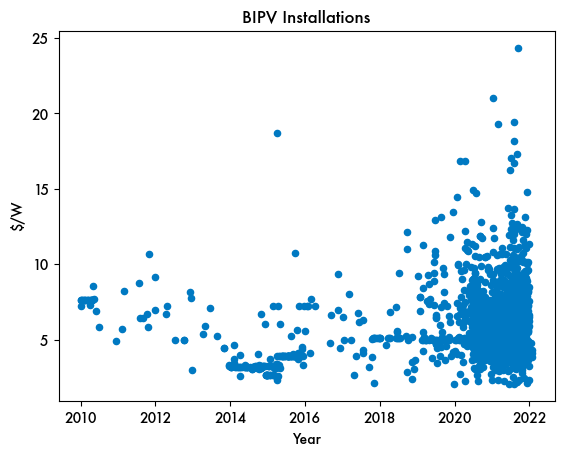

In [13]:
plt.figure(4)
BIPV_scatter = pv[pv['BIPV_module_1']==1].plot.scatter(x = 'installation_date', y = 'total $/W', color ='#0079C2')
BIPV_scatter.set_title('BIPV Installations')
BIPV_scatter.set_xlabel('Year')
BIPV_scatter.set_ylabel('$/W')

        installation_date  system_size_DC  total_installed_price  \
94571          2012-12-31       38.700000              135901.47   
103900         2014-08-07        5.886000               27664.00   
106541         2015-11-23        5.886000               31195.00   
108564         2016-04-18        4.480000               21483.00   
108767         2015-12-23        4.578000               22432.00   
...                   ...             ...                    ...   
2240990        2021-04-05        9.425000               45000.00   
2254976        2021-03-15        9.900000               28841.05   
2260913        2018-06-11        5.173037               35000.00   
2260919        2018-07-25        5.690000               35000.00   
2263520        2019-05-15        3.570000                9627.00   

         rebate_or_grant  tilt_1 module_manufacturer_1  BIPV_module_1  \
94571            46502.0    90.0              SunPower              0   
103900             903.0    90.0     

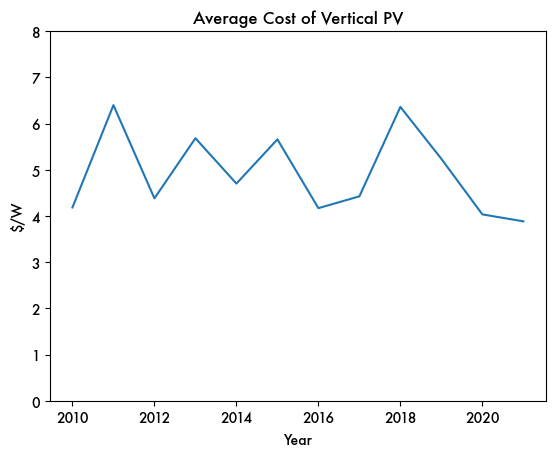

In [14]:
##### Looking at 90 degree tilt (0 is flat), assuming that means vertical
plt.figure(5)
year2 = list(range(2010,2022))
vertical = pv[pv['tilt_1']==90]
avg_vert = vertical.groupby(pv.installation_date.dt.year)['total $/W'].mean()
plt.plot(year2, avg_vert)
plt.ylim([0, 8])
plt.title('Average Cost of Vertical PV')
plt.xlabel('Year')
plt.ylabel('$/W')
print(vertical)

Vertically mounted PV may not be classified as BIPV, but should also be considered since it is most likely on a facade.
Looking at the list of companies and products, we see that current BIPV graphs are mostly RIPV, but do include some windows and other types of BIPV.
Also, the BIPV data is installation as a whole not incremental costs. It should be noted that when BIPV is installed, it's often in replacement of a traditional building material. When considering that replacement cost, BIPV would be cheaper than it is listed (also known as the incremental cost). 
*Consider doing just vertical. I have the vertical graphed from the data that had classifications for BIPV/notBIPV

In [15]:
efficiency = pv.groupby(pv.installation_date.dt.year)['efficiency_module_1'].mean()
print(efficiency)

installation_date
2010.0    0.149677
2011.0    0.153443
2012.0    0.159875
2013.0    0.162786
2014.0    0.160568
2015.0    0.168907
2016.0    0.163914
2017.0    0.164390
2018.0    0.174055
2019.0    0.189231
2020.0    0.175514
2021.0    0.182849
2022.0    0.201934
Name: efficiency_module_1, dtype: float64


Text(0, 0.5, '% Efficiency')

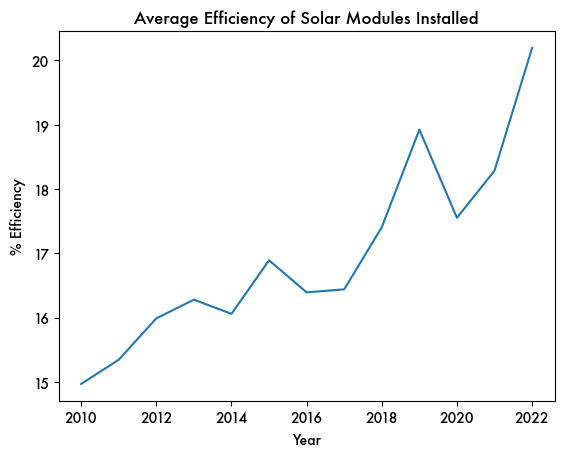

In [16]:
percent = efficiency*100
plt.plot(year, percent)
plt.title('Average Efficiency of Solar Modules Installed')
plt.xlabel('Year')
plt.ylabel("% Efficiency")